In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving X-Ray-Scanner-Dataset.zip to X-Ray-Scanner-Dataset (1).zip
User uploaded file "X-Ray-Scanner-Dataset (1).zip" with length 41051986 bytes


In [ ]:
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
import pandas as pd
import seaborn as sns
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#unzipping dataset file
file_name = "/content/X-Ray-Scanner-Dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#dataaugmentation
import numpy as np
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
import os
import pandas as pd

def load_baggage_scanner_dataset(base_dir):
    # Directories for dangerous and non-dangerous images
    dangerous_dir = os.path.join(base_dir, 'Dangerous')
    not_dangerous_dir = os.path.join(base_dir, 'Not_Dangerous')

    # Lists to hold the image paths and labels
    image_paths = []
    labels = []

    # Load dangerous images
    for img_file in os.listdir(dangerous_dir):
        if img_file.endswith(('.jpg', '.png')):  # Add other image formats if necessary
            image_paths.append(os.path.join(dangerous_dir, img_file))
            labels.append('dangerous')

    # Load non-dangerous images
    for img_file in os.listdir(not_dangerous_dir):
        if img_file.endswith(('.jpg', '.png')):  # Add other image formats if necessary
            image_paths.append(os.path.join(not_dangerous_dir, img_file))
            labels.append('non-dangerous')

    # Create a DataFrame with image paths and corresponding labels
    df = pd.DataFrame({
        'filename': image_paths,
        'label': labels
    })

    return df

# Define the base directory of your dataset
base_dir = '/content/X-Ray-Scanner-Dataset'

# Load the dataset
dataset_df = load_baggage_scanner_dataset(base_dir)

# Check the distribution of labels
print("Label distribution:")
print(dataset_df['label'].value_counts())

# Display the first few rows to inspect the dataframe
print("Dataset:")
print(dataset_df.head())


Label distribution:
label
dangerous        180
non-dangerous    179
Name: count, dtype: int64
Dataset:
                                            filename      label
0  /content/X-Ray-Scanner-Dataset/Dangerous/B0046...  dangerous
1  /content/X-Ray-Scanner-Dataset/Dangerous/B0046...  dangerous
2  /content/X-Ray-Scanner-Dataset/Dangerous/B0046...  dangerous
3  /content/X-Ray-Scanner-Dataset/Dangerous/B0046...  dangerous
4  /content/X-Ray-Scanner-Dataset/Dangerous/B0046...  dangerous


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets (e.g., 70% train, 20% val, 10% test)
train_df, test_df = train_test_split(dataset_df, test_size=0.3, stratify=dataset_df['label'], random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.33, stratify=test_df['label'], random_state=42)  # 0.33 * 0.3 ≈ 10%

# Verify the splits
print("Train set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))


Train set size: 251
Validation set size: 72
Test set size: 36


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Flatten

input_dim = 1024
num_classes = 2

# Define the model
model = Sequential()

# Add input layer
model.add(Flatten(input_shape=(128, 128, 3)))  # Flatten the input
model.add(Dense(128, activation='relu'))

# Add hidden layers with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add output layer
model.add(Dense(num_classes, activation='sigmoid'))  # For multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,  # You can increase the number of epochs for better results
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5871 - loss: 6.6610 - val_accuracy: 0.5000 - val_loss: 4.2634
Epoch 2/30
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5312 - loss: 3.7400

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.5312 - loss: 3.7400 - val_accuracy: 0.5000 - val_loss: 4.9886
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.6180 - loss: 4.0315 - val_accuracy: 0.4531 - val_loss: 2.1624
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3438 - loss: 2.5854 - val_accuracy: 0.5000 - val_loss: 1.9063
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.7206 - loss: 2.5048 - val_accuracy: 0.8594 - val_loss: 1.7208
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9375 - loss: 1.2396 - val_accuracy: 0.8750 - val_loss: 1.1840
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.6881 - loss: 2.0327 - val_accuracy: 0.8281 - val_loss: 3.4079
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8438 - loss: 2.0624 - val_accuracy: 0.8750 - val_loss: 1.6505
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.7984 - loss: 2.3177 - val_accuracy: 0.8750 - val_loss: 1.4020
Epoch 1

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  #
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 36 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - accuracy: 0.9375 - loss: 0.5652
Test Accuracy: 93.75%


In [ ]:
final_train_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_train_accuracy * 100:.2f}%")


Final Training Accuracy: 87.50%


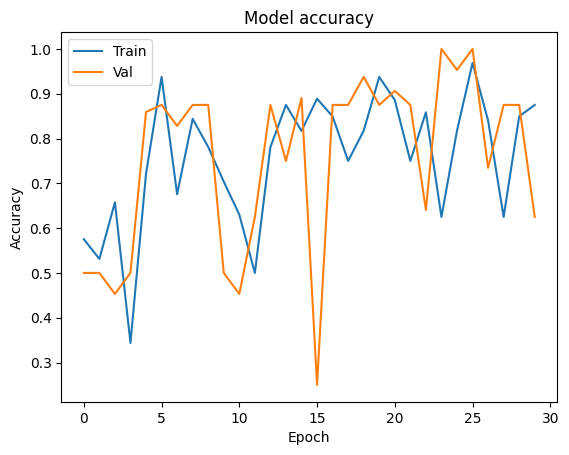

In [ ]:
# prompt: plot train and val accuracies

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


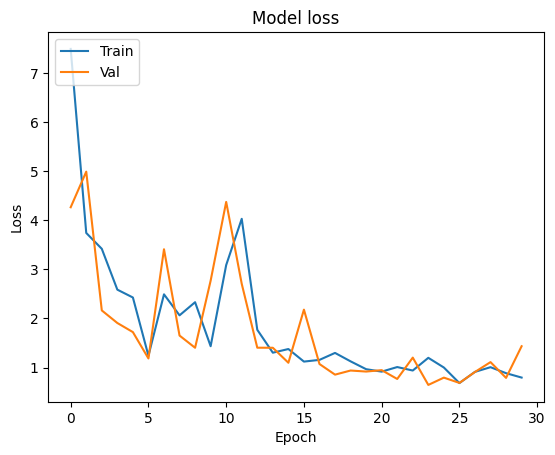

In [ ]:
# prompt: plot val and training loss

import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


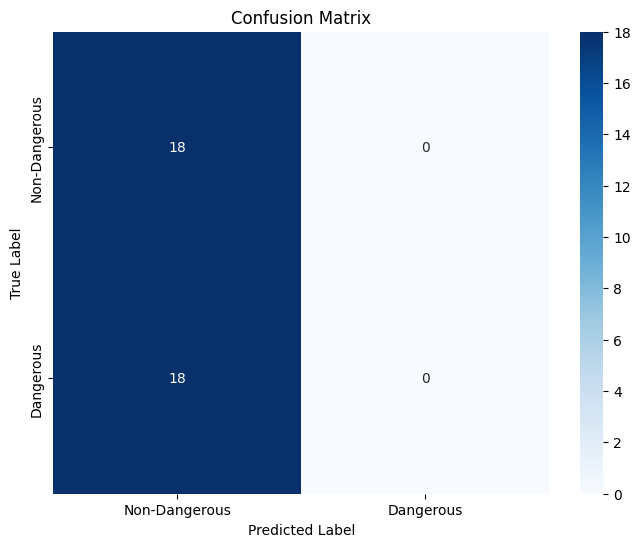

In [ ]:
# prompt: confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true labels for the test set
y_true = test_generator.classes

# Predict the labels for the test set
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int)  # Assuming binary classification

# Convert y_pred to 1D array of predicted classes
y_pred = np.argmax(y_pred, axis=1) # Convert to binary format by selecting the class with highest probability

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Dangerous', 'Dangerous'],
            yticklabels=['Non-Dangerous', 'Dangerous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# prompt: classification report that

from sklearn.metrics import classification_report

# ... (Your existing code) ...

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['Non-Dangerous', 'Dangerous'])

print(report)


               precision    recall  f1-score   support

Non-Dangerous       0.50      1.00      0.67        18
    Dangerous       0.00      0.00      0.00        18

     accuracy                           0.50        36
    macro avg       0.25      0.50      0.33        36
 weighted avg       0.25      0.50      0.33        36



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
